#1. Pre-processing images
- Resizing images to size (224,224) as it is standard for DenseNet201
- Normalising values within the range of 0 to 1
- Splitting data into training and testing sets

##1.1 Resizing and normalising images

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Defining function that can read image files from folder path list

In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folders(base_path, class_names, image_size=(224, 224)):

    # Initialising list containing the images, list containing image labels,
    images = []
    labels = []
    class_mapping = {i: class_names[i] for i in range(len(class_names))}  # Class index to folder mapping


    # This creates an index and assigns it to each folder i.e. 0 Plastic, 1 Organic, 2 NonOrganic and NonPlastic
    for class_index, class_name in enumerate(class_names):
        folder_path = os.path.join(base_path, class_name)

        # Checking whether the folder exists in base path
        if not os.path.exists(folder_path):
            print(f"Folder '{class_name}' not found in '{base_path}'")
            continue

        # Looping for all images in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)

            # Read the image using OpenCV
            img = cv2.imread(file_path)

            # This part works; saving time by commenting out
            # if img is None:
            #     print(f"Could not read image: {file_path}")
            #     continue

            # Resize image
            img = cv2.resize(img, image_size)

            # Convert from BGR to RGB for TensorFlow/PyTorch compatibility
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Normalise pixel values to [0,1]
            img = img / 255.0

            # Append image and label
            images.append(img)
            labels.append(class_index)

    # Convert to numpy arrays
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    return images, labels, class_mapping

Generating images, labels and class mapping

In [ ]:
# Defining the base folder and folder names in a list
base_folder = "/content/drive/MyDrive/AIStudio/Mini version CNN"
class_names = ["Plastic", "Organic", "NonOrganic and NonPlastic"]

images, labels, class_mapping = load_images_from_folders(base_folder, class_names)

In [ ]:
# Testing whether i could only use 10 images ----> could be useful to test everything is working with Charlie's part
print(len(images[0:10]))

10


In [ ]:
# Printing images

print("Images",images)
print("\nLabels",labels)
print("\nClass mapping",class_mapping)


Images [[[[0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   ...
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]]

  [[0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   ...
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]]

  [[0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   ...
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]]

  ...

  [[0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   ...
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]
   [0.93333334 0.93333334 0.93333334]]

  [[0.93333334 0.93333334 0.93333334]


##1.2 Observing the original image to see if resizing is appropriate

Can visualise original image and check with pre-processed image whether resizing is appropriate

In [ ]:
# # Checking whether resized image is appropriate

# import cv2
# import os
# import matplotlib.pyplot as plt
# import numpy as np


# def testing_function(base_path, class_names, image_size=(128, 128)):

#     # Initialising list containing the images, list containing image labels,
#     images = []
#     labels = []
#     class_mapping = {i: class_names[i] for i in range(len(class_names))}  # Class index to folder mapping


#     # This creates an index and assigns it to each folder i.e. 0 Plastic, 1 Organic, 2 NonOrganic and NonPlastic
#     for class_index, class_name in enumerate(class_names):
#         folder_path = os.path.join(base_path, class_name)

#         # Checking whether the folder exists in base path
#         if not os.path.exists(folder_path):
#             print(f"Folder '{class_name}' not found in '{base_path}'")
#             continue

#         # Looping for all images in the folder
#         for file in os.listdir(folder_path):
#             file_path = '/content/drive/MyDrive/AIStudio/Mini version CNN/Plastic/plastic11.jpg' # Can change this

#             # Read the image using OpenCV
#             img = cv2.imread(file_path)

#             # Resize image
#             img_resized = cv2.resize(img, image_size)

#             # Convert from BGR to RGB for TensorFlow/PyTorch compatibility
#             img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

#             # Normalise pixel values to [0,1]
#             img_resized = img_resized / 255.0

#             # Plot original vs. resized image
#             plt.figure(figsize=(8, 4))

#             plt.subplot(1, 2, 1)
#             plt.imshow(img)
#             plt.title("Original Image")
#             plt.axis("off")

#             plt.subplot(1, 2, 2)
#             plt.imshow(img_resized)
#             plt.title(f"Resized to {(128, 128)}")
#             plt.axis("off")

#             plt.show()



In [ ]:
# testing_function(base_folder, file_list)

##1.3 Splitting the dataset

Manually splitting data (80: 20) for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    images, labels,  # Use NumPy arrays
    test_size=0.2,  # 20% for validation
    random_state=42,  # Ensure reproducibility
    stratify=labels  # Maintain class distribution
)

Ensuring that the training and testing data has been one-hot encoded

In [ ]:
from tensorflow.keras.utils import to_categorical

# Count unique classes
num_classes = len(np.unique(labels))

# Ensure labels are categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

print("Updated y_train shape:", y_train.shape)  # Should be (num_samples, num_classes)

Updated y_train shape: (48, 3)


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48, 224, 224, 3)
(12, 224, 224, 3)
(48, 3)
(12, 3)


#2. Developing the model

- Developing the DenseNet201 Model
- Hypertuning parameters
- Saving the model optimised with the best parameters

##2.1 Developing DenseNet201 Model

Defining the training generator and validation generator

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras_tuner as kt

# Define image size (DenseNet201 requires at least 32x32, but 224x224 is standard)
IMAGE_SIZE = (224, 224) # This image size was used in literature
BATCH_SIZE = 32

# Image augmentation for training
# Note 1: Normalisation can be done here, but was manually performed in pre-processing stage
# Note 2: brightness can be altered: brightness_range=[0.5, 1.5]  # Adjust brightness
# Note 3: Implementing this makes the accuracy of the model worse
# train_datagen = ImageDataGenerator(
#     rotation_range=20, # Rotates up to 20 degrees
#     width_shift_range=0.2, # Shifts horizontally
#     height_shift_range=0.2, # Shifts vertically
#     horizontal_flip=True, # Flips images horizontally
# )

# Defining ImageDataGenerator for training images
train_datagen = ImageDataGenerator()

# Defining ImageDataGenerator for validation images
val_datagen = ImageDataGenerator()

# Loading training and validation images and their respective labels
train_generator = train_datagen.flow(X_train, y_train, batch_size= BATCH_SIZE, shuffle=True) # Shuffle = true to improve training generalisation
val_generator = val_datagen.flow(X_val, y_val, batch_size = BATCH_SIZE, shuffle = False)


Defining function that builds DenseNet201 model

In [ ]:
def build_model(hp):
    """
    Function to build a DenseNet201-based model with hyperparameter tuning.

    Args:
        hp (kt.HyperParameters): Hyperparameter search space.

    Returns:
        Keras Model with dynamically selected hyperparameters.
    """

    # Load DenseNet201 without classification layer
    base_model = DenseNet201(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Keep pretrained weights frozen

    # Add classification layers
    x = GlobalAveragePooling2D()(base_model.output)

    # Tune number of Dense layers
    # Note: can omit for loop for testing
    for i in range(hp.Int('num_dense_layers', 2, 4)): # Adjusted to 2 to 4; so altogether there is an additional 6-8 layers in total
        x = Dense(hp.Int(f'units_{i}', min_value=128, max_value=1024, step=128), activation='relu')(x)
        x = Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1))(x)

    # Output Layer (Number of Classes)
    output_layer = Dense(num_classes, activation="softmax")(x)

    # Create Model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Tune Learning Rate
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), #====================================================== Try SGD to see if it improves the performance (Note: Reference [1])
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


Initialising the tuner using Hyperband which is more efficient than RandomSearch; therefore ideal for large datasets

In [ ]:
# Initialise the tuner using Hyperband
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="keras_tuner_results",
    project_name="densenet_tuning"
)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Perform hyperparameter tuning

In [ ]:
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Keep training epochs low to speed up tuning
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    validation_steps=len(X_val) // BATCH_SIZE
)


Trial 30 Complete [00h 02m 18s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.75
Total elapsed time: 00h 35m 58s


Retrieve the best model

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]  # Get best parameters

print(f"""
Best Hyperparameters:
- Dense Neurons: {best_hps.get('dense_units')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Learning Rate: {best_hps.get('learning_rate')}
""")


Best Hyperparameters:
- Dense Neurons: 768
- Dropout Rate: 0.30000000000000004
- Learning Rate: 0.0001



Training and saving the best model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd

# Define the checkpoint to save the best model
checkpoint = ModelCheckpoint(
    filepath= "/content/drive/MyDrive/AIStudio/Mini version CNN/DenseNet201_best_model.h5",  # Path to save
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,  # Only save model if it improves
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1  # Print save message
)

# Build the best model using optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with checkpointing
history = best_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Train longer with best parameters
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    validation_steps=len(X_val) // BATCH_SIZE,
    callbacks=[checkpoint]  # Add checkpoint callback here
)

# Saving history for plotting graph
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history.csv", index=False)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.2500 - loss: 1.5560
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to /content/drive/MyDrive/AIStudio/Mini version CNN/DenseNet201_best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step - accuracy: 0.2500 - loss: 1.5560 - val_accuracy: 0.2500 - val_loss: 1.2770
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3750 - loss: 1.2572
Epoch 2: val_accuracy did not improve from 0.25000
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3750 - loss: 1.2572 - val_accuracy: 0.2500 - val_loss: 1.2147
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.4688 - loss: 1.2160
Epoch 3: val_accuracy improved from 0.25000 to 0.33333, saving model to /content/drive/MyDrive/AIStudio/Mini version CNN/DenseNet201_best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step - accuracy: 0.4688 - loss: 1.2160 - val_accuracy: 0.3333 - val_loss: 1.1810
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6875 - loss: 0.7301
Epoch 4: val_accuracy did not improve from 0.33333
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6875 - loss: 0.7301 - val_accuracy: 0.2500 - val_loss: 1.1642
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6250 - loss: 0.8378
Epoch 5: val_accuracy did not improve from 0.33333
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6250 - loss: 0.8378 - val_accuracy: 0.2500 - val_loss: 1.1564
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6562 - loss: 0.8845
Epoch 6: val_accuracy did not improve from 0.33333
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6562 - loss: 0.8845 - val_accuracy: 0.2500 - val_loss: 1.1432
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7500 - loss: 0.8290
Epoch 7: val_accuracy did not improve from 0.33333
1/1 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.7188 - loss: 0.6626 - val_accuracy: 0.4167 - val_loss: 1.0846
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7812 - loss: 0.5509
Epoch 11: val_accuracy improved from 0.41667 to 0.50000, saving model to /content/drive/MyDrive/AIStudio/Mini version CNN/DenseNet201_best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.7812 - loss: 0.5509 - val_accuracy: 0.5000 - val_loss: 1.0698
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9375 - loss: 0.5683
Epoch 12: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9375 - loss: 0.5683 - val_accuracy: 0.5000 - val_loss: 1.0583
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7500 - loss: 0.5421
Epoch 13: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7500 - loss: 0.5421 - val_accuracy: 0.5000 - val_loss: 1.0507
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8750 - loss: 0.4741
Epoch 14: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8750 - loss: 0.4741 - val_accuracy: 0.5000 - val_loss: 1.0451
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8750 - loss: 0.3305
Epoch 15: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━

Loading saved model

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model("/content/drive/MyDrive/AIStudio/Mini version CNN/DenseNet201_best_model.h5")

Loading history

In [ ]:
history_df = pd.read_csv("training_history.csv")

#3. Evaluation Metrics and Visualisations
Computing the confusion matrix and the following evaluation metrics:
- Accuracy
- F1 Score
- Precision
- Recall


##3.1 Evaluation Metrics

Converting softmax probabilities to class labels for evaluation

In [ ]:
import numpy as np

# Get model predictions on the validation set
y_pred_probs = best_model.predict(val_generator)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true labels from the generator
y_true = np.argmax(y_val, axis=1)  # Convert one-hot labels to class indices


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Computing evaluation metrics using sklearn.metrics

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Get class labels
class_labels = ["Plastic", "Organic", "Non-Plastic & Non-Organic"]  # Replace with actual class names

# Compute evaluation metrics per class
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Convert to a DataFrame for better readability
df_report = pd.DataFrame(report).transpose()

# Display the table
print("\n==================== Evaluation Metrics Report ====================")
print(df_report)


==================== Evaluation Metrics Report ====================
                           precision  recall  f1-score  support
Plastic                          0.5    0.25  0.333333      4.0
Organic                          0.5    0.75  0.600000      4.0
Non-Plastic & Non-Organic        0.5    0.50  0.500000      4.0
accuracy                         0.5    0.50  0.500000      0.5
macro avg                        0.5    0.50  0.477778     12.0
weighted avg                     0.5    0.50  0.477778     12.0


Saving the evaluation metrics to CSV file

In [ ]:
# Saving to CSV file
df_report.to_csv("/content/drive/MyDrive/AIStudio/Mini version CNN/evaluation_metrics.csv")

##3.2 Confusion Matrix

Computing and displaying the confusion matrix

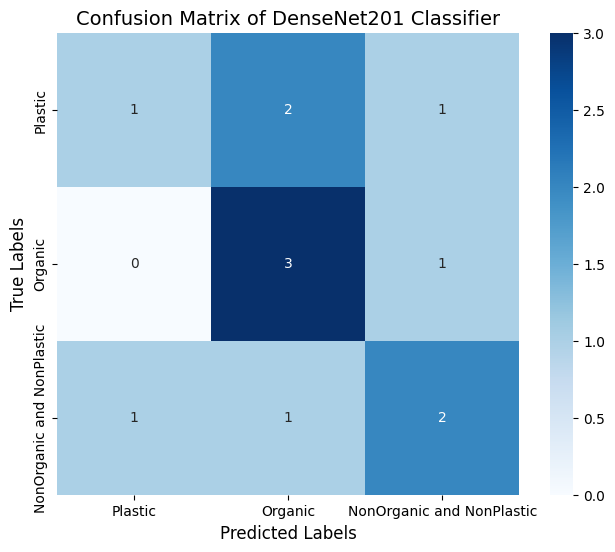

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels = [0,1,2])

# Plot the confusion matrix
# Note that this is correct even though it looks wrong: Only used 12 images as testing data and sum equals 12
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True, xticklabels= class_names, yticklabels= class_names)
plt.xlabel("Predicted Labels", fontsize = 12)
plt.ylabel("True Labels", fontsize = 12)
plt.title("Confusion Matrix of DenseNet201 Classifier", fontsize = 14)
plt.show()


##3.3 Training and validation accuracy/ loss curve

Plotting training and validation accuracy/ loss curves

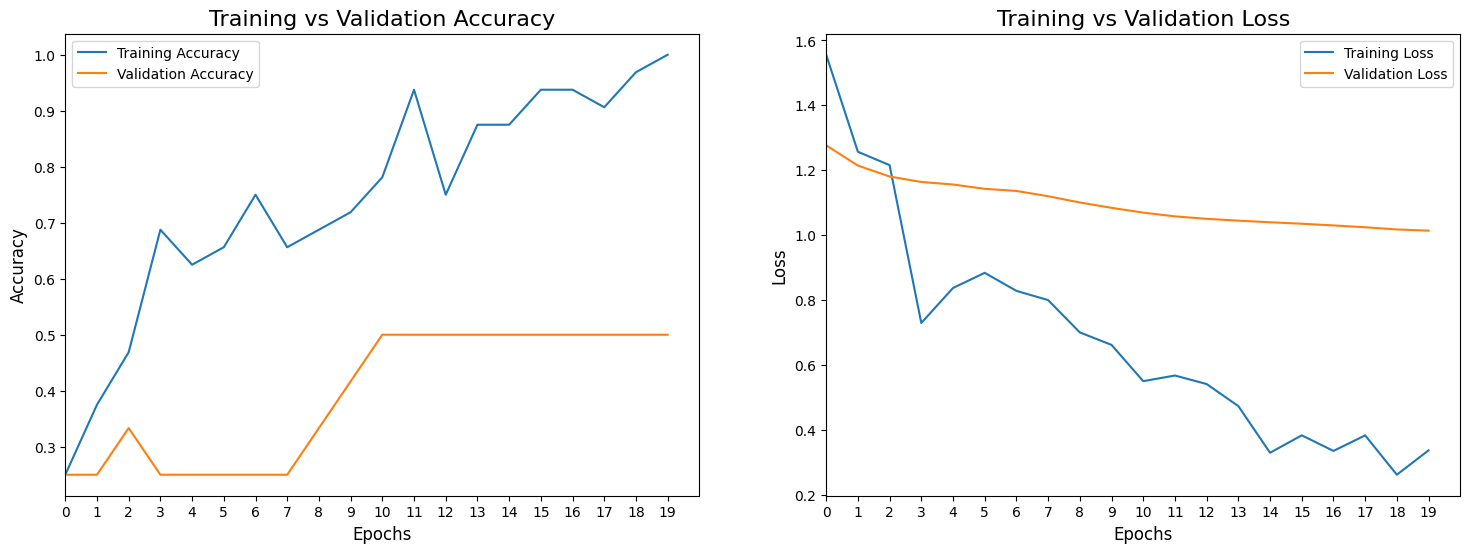

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label="Training Accuracy")
plt.plot(history_df['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.xlim([0, len(history_df)])  # Valid x-range
plt.xticks(range(len(history_df)))  # Set ticks for all epochs
plt.legend()
plt.title("Training vs Validation Accuracy", fontsize = 16)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label="Training Loss")
plt.plot(history_df['val_loss'], label="Validation Loss")
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel("Loss", fontsize = 12)
plt.xlim([0, len(history_df)])  # Valid x-range
plt.xticks(range(len(history_df)))  # Optional: tick at every epoch
plt.legend()
plt.title("Training vs Validation Loss", fontsize = 16)

plt.show()
